In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 28 17:51:42 2017
https://docs.databricks.com/spark/latest/mllib/third-party-libraries.html
@author: hive
"""


'\nCreated on Fri Jul 28 17:51:42 2017\nhttps://docs.databricks.com/spark/latest/mllib/third-party-libraries.html\n@author: hive\n'

In [1]:
# Load data into a Pandas dataframe
import pandas
import cStringIO
from pyspark.sql import *
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark import SparkContext, SparkConf
from pyspark.sql import  Row
from pyspark.sql.functions import *
from pyspark.sql import SQLContext
import time,datetime
import sys
import os

In [6]:
conf = SparkConf()
conf.setMaster('yarn-client')
conf.setAppName('pyspark-sklearn-tcz')
#conf.set("hive.support.quoted.identifiers", "none")
sc = SparkContext(conf=conf)
sqlContext = SQLContext(sc)


In [14]:
localData = sc.wholeTextFiles("/user/hive/spark/diamonds.csv").collect()[0][1]
localData
output = cStringIO.StringIO(localData)
pandasData = pandas.read_csv(output)
pandasData = pandasData.iloc[:,1:] # remove line number

In [10]:
pandasData.describe

<bound method DataFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6       0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7       0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8       0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9       0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
10      0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11      0.23      Ideal     J     VS1   

In [10]:
pandasData

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [11]:
pandasData.count()  

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

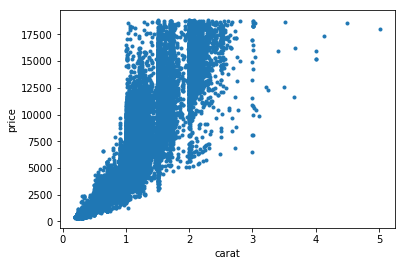

In [12]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(pandasData['carat'], pandasData['price'], '.')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [13]:
sparkDataframe = sqlContext.createDataFrame(pandasData)
type(sparkDataframe)
sparkDataframe.show()

+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+-----+---------+-----+-------+-----+-----+-----+----+----+----+
| 0.23|    Ideal|    E|    SI2| 61.5| 55.0|  326|3.95|3.98|2.43|
| 0.21|  Premium|    E|    SI1| 59.8| 61.0|  326|3.89|3.84|2.31|
| 0.23|     Good|    E|    VS1| 56.9| 65.0|  327|4.05|4.07|2.31|
| 0.29|  Premium|    I|    VS2| 62.4| 58.0|  334| 4.2|4.23|2.63|
| 0.31|     Good|    J|    SI2| 63.3| 58.0|  335|4.34|4.35|2.75|
| 0.24|Very Good|    J|   VVS2| 62.8| 57.0|  336|3.94|3.96|2.48|
| 0.24|Very Good|    I|   VVS1| 62.3| 57.0|  336|3.95|3.98|2.47|
| 0.26|Very Good|    H|    SI1| 61.9| 55.0|  337|4.07|4.11|2.53|
| 0.22|     Fair|    E|    VS2| 65.1| 61.0|  337|3.87|3.78|2.49|
| 0.23|Very Good|    H|    VS1| 59.4| 61.0|  338| 4.0|4.05|2.39|
|  0.3|     Good|    J|    SI1| 64.0| 55.0|  339|4.25|4.28|2.73|
| 0.23|    Ideal|    J|    VS1| 62.8| 56.0|  340|3.93| 3.9|2.46|
| 0.22|  Premium|    F|  

In [17]:
pandasData['cut'] = pandasData['cut'].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
pandasData['color'] = pandasData['color'].replace({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
pandasData['clarity'] = pandasData['clarity'].replace({'I1':0, 'SI1':1, 'SI2':2, 'VS1':3, 'VS2':4, 'VVS1':5, 'VVS2':6, 'IF':7})
pandasData

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,1,5,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,2,1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,5,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,2,3,59.4,61.0,338,4.00,4.05,2.39


In [18]:
# Split data into a labels dataframe and a features dataframe
labels = pandasData['price'].values
featureNames = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
features = pandasData[featureNames].values


In [19]:
# Normalize features (columns) to have unit variance
from sklearn.preprocessing import normalize
features = normalize(features, axis=0)
features

array([[ 0.00106702,  0.00553547,  0.005655  , ...,  0.0029123 ,
         0.00293078,  0.00289958],
       [ 0.00097424,  0.0041516 ,  0.005655  , ...,  0.00286806,
         0.00282769,  0.00275639],
       [ 0.00106702,  0.00138387,  0.005655  , ...,  0.00298603,
         0.00299705,  0.00275639],
       ..., 
       [ 0.00324745,  0.00276773,  0.006786  , ...,  0.00417307,
         0.00418262,  0.00424794],
       [ 0.00398973,  0.0041516 ,  0.002262  , ...,  0.00453434,
         0.00450662,  0.00446272],
       [ 0.00347941,  0.00553547,  0.006786  , ...,  0.0042984 ,
         0.00432253,  0.0043434 ]])

In [26]:
from sklearn.cross_validation import train_test_split
trainingLabels, testLabels, trainingFeatures, testFeatures = train_test_split(labels, features, test_size=0.3)
ntrain, ntest = len(trainingLabels), len(testLabels)
print 'Split data randomly into 2 sets: %d training and %d test instances.' % (ntrain, ntest)


Split data randomly into 2 sets: 37758 training and 16182 test instances.


In [27]:
# Train a model with fixed hyperparameters, and print out the intercept and coefficients.
from sklearn import linear_model
origAlpha = 0.5 # "alpha" is the regularization hyperparameter
origClf = linear_model.Ridge(alpha=origAlpha)
origClf.fit(features, labels)
print 'Trained model with fixed alpha = %g' % origAlpha
print '  Model intercept: %g' % origClf.intercept_
print '  Model coefficients:'
for i in range(len(featureNames)):
    print '    %g\t%s' % (origClf.coef_[i], featureNames[i])

Trained model with fixed alpha = 0.5
  Model intercept: -57.6952
  Model coefficients:
    503932	carat
    -668.814	cut
    -36580.6	color
    4104.09	clarity
    -887.179	depth
    4074.86	table
    178054	x
    176814	y
    175385	z


In [28]:
# Score the initial model.  It does not do that well.
origScore = origClf.score(trainingFeatures, trainingLabels)
origScore

0.55801014723824749

In [29]:
# We use scikit-learn's cross_validation module, which helps split our data randomly into k equal-size parts ("folds").
from sklearn import cross_validation
numFolds = 3 # You may want to use more (10 or so) in practice
kf = cross_validation.KFold(ntrain, n_folds=numFolds)


In [30]:

# "alphas" is a list of hyperparameter values to test
alphas = [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# Create a list of tasks to distribute
tasks = []
for alpha in alphas:
    for fold in range(numFolds):
        tasks = tasks + [(alpha, fold)]


In [32]:
def trainOneModel(alpha, fold):
    """
    Given 1 task (1 hyperparameter alpha value + 1 fold index), train the corresponding model.
    Return: model, score on the fold's test data, task info.
    """
    # Extract indices for this fold
    trainIndex, valIndex = [], []
    fold_ = 0 # index into folds 'kf'
    for trainIndex_, valIndex_ in kf:
        if fold_ == fold:
            trainIndex, valIndex = trainIndex_, valIndex_
        break
    fold_ += 1
    # Get training data from the broadcast variables
    localTrainingFeatures = trainingFeaturesBroadcast.value
    localTrainingLabels = trainingLabelsBroadcast.value
    X_train, X_val = localTrainingFeatures[trainIndex], localTrainingFeatures[valIndex]
    Y_train, Y_val = localTrainingLabels[trainIndex], localTrainingLabels[valIndex]
    # Train the model, and score it
    clf = linear_model.Ridge(alpha=alpha)
    clf.fit(X_train, Y_train)
    score = clf.score(X_val, Y_val)
    return clf, score, alpha, fold

In [33]:
# Create an RDD of tasks.  We set the number of partitions equal to the number of tasks to ensure maximum parallelism.
tasksRDD = sc.parallelize(tasks, numSlices = len(tasks))

trainingFeaturesBroadcast = sc.broadcast(trainingFeatures)
trainingLabelsBroadcast = sc.broadcast(trainingLabels)

trainedModelAndScores = tasksRDD.map(lambda alpha_fold: trainOneModel(alpha_fold[0], alpha_fold[1]))
trainedModelAndScores.cache()
trainedModelAndScores.count()

27

In [34]:
# Since we are done with our broadcast variables, we can clean them up.
# (This will happen automatically, but we can make it happen earlier by explicitly unpersisting the broadcast variables.
trainingFeaturesBroadcast.unpersist()
trainingLabelsBroadcast.unpersist()

In [35]:
# Collect the results.
allScores = trainedModelAndScores.map(lambda x: (x[1], x[2], x[3])).collect()
# Average scores over folds
avgScores = dict(map(lambda alpha: (alpha, 0.0), alphas))
for score, alpha, fold in allScores:
    avgScores[alpha] += score
for alpha in alphas:
    avgScores[alpha] /= numFolds
avgScores


{0.0: 0.88756101295245626,
 0.0001: 0.89448185653345724,
 0.001: 0.89220276976056978,
 0.01: 0.87959037030907916,
 0.1: 0.73330839792452152,
 1.0: 0.23042945836649695,
 10.0: 0.02877865293303165,
 100.0: 0.0029079987275266728,
 1000.0: 0.00024871392951586468}

In [46]:
# Find best score
bestAlpha = -1
bestScore = -1
for alpha in alphas:
    if avgScores[alpha] > bestScore:
        bestAlpha = alpha
        bestScore = avgScores[alpha]
print 'Found best alpha: %g, which gives score: %g' % (bestAlpha, bestScore)


Found best alpha: 0.0001, which gives score: 0.894482


In [37]:
# Use Databricks' display() function to plot the scores vs. alpha.  We use a namedtuple to tell Databricks names for the columns (alpha and the score).
import numpy
from collections import namedtuple
Score = namedtuple('Score', 'log_alpha score')
Score
print(map(lambda alpha: Score(float(numpy.log(alpha + 0.00000001)), float(avgScores[alpha])), avgScores))


[Score(log_alpha=-18.420680743952367, score=0.8875610129524563), Score(log_alpha=9.999999889225291e-09, score=0.23042945836649695), Score(log_alpha=4.605170186088091, score=0.0029079987275266728), Score(log_alpha=-2.3025849929940505, score=0.7333083979245215), Score(log_alpha=6.907755278992137, score=0.0002487139295158647), Score(log_alpha=2.302585093994046, score=0.02877865293303165), Score(log_alpha=-6.907745279032137, score=0.8922027697605698), Score(log_alpha=-9.21024037697585, score=0.8944818565334572), Score(log_alpha=-4.605169185988592, score=0.8795903703090792)]


In [38]:
# Use bestAlpha, and train a final model.
tunedClf = linear_model.Ridge(alpha=bestAlpha)
tunedClf.fit(trainingFeatures, trainingLabels)


Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
origTrainingScore, origTestScore = origClf.score(trainingFeatures, trainingLabels), origClf.score(testFeatures, testLabels)
tunedTrainingScore, tunedTestScore = tunedClf.score(trainingFeatures, trainingLabels), tunedClf.score(testFeatures, testLabels)
print 'Compare original model (without hyperparameter tuning) and final model (with tuning) on test data\n'
print 'Model   \tAlpha\tTraining   \tTest'
print 'Original\t%g\t%g\t%g' % (origAlpha, origTrainingScore, origTestScore)
print 'Tuned   \t%g\t%g\t%g' % (bestAlpha, tunedTrainingScore, tunedTestScore)


Compare original model (without hyperparameter tuning) and final model (with tuning) on test data

Model   	Alpha	Training   	Test
Original	0.5	0.55801	0.561137
Tuned   	0.0001	0.895023	0.893079


In [41]:
print 'Tuned model with best alpha = %g' % bestAlpha
print '  Model intercept: %g' % tunedClf.intercept_
print '  Model coefficients:'
for i in range(len(featureNames)):
    print '    %g\t%s' % (tunedClf.coef_[i], featureNames[i])


Tuned model with best alpha = 0.0001
  Model intercept: 2047.95
  Model coefficients:
    2.25671e+06	carat
    105548	cut
    252738	color
    304401	clarity
    -651696	depth
    -321988	table
    -1.04632e+06	x
    211522	y
    -302670	z


In [42]:
# Convert the scikit-learn model into an equivalent MLlib model
from pyspark.mllib.regression import LinearRegressionModel
mllibModel = LinearRegressionModel(tunedClf.coef_, tunedClf.intercept_)
mllibModel

(weights=[2256705.18555,105548.476673,252737.987431,304401.087832,-651695.505804,-321988.428351,-1046318.2679,211521.896914,-302669.798851], intercept=2047.9473360765985)

In [49]:
# Demonstrate that the models compute the same predictions
sklearnPredictions = tunedClf.predict(testFeatures)
sklearnPredictions


array([ 2288.86157151,  6855.93798707,  3107.59012727, ...,  2641.21888201,
        -286.56952147,  1714.82340675])

In [50]:
mllibPredictions = numpy.array(map(lambda x: mllibModel.predict(x), testFeatures))
mllibPredictions

array([ 2288.86157151,  6855.93798707,  3107.59012727, ...,  2641.21888201,
        -286.56952147,  1714.82340675])

In [52]:
differences = sklearnPredictions - mllibPredictions
differences


array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         0.00000000e+00,  -4.54747351e-13,   0.00000000e+00])

In [54]:
type(differences)

numpy.ndarray

In [56]:
sumSquaredDifferences = numpy.sum(differences * differences)
print 'Total difference between scikit-learn and MLlib model predictions: %g' % sumSquaredDifferences


Total difference between scikit-learn and MLlib model predictions: 2.55775e-21


In [4]:
sc.stop()